# Stage 5 - Data Analysis

In [1]:
from collections import Counter
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py_entitymatching as em
import seaborn as sns
%matplotlib inline

data_dir = './dataset/structured_data/'
E_table_name = "E.csv"
E_table = pd.read_csv(data_dir + E_table_name, encoding = "ISO-8859-1");

In [2]:
E_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 16 columns):
Unnamed: 0       7121 non-null int64
ltable_id        3110 non-null float64
rtable_id        4714 non-null float64
Name             7121 non-null object
Country          7121 non-null object
Industry         6224 non-null object
MarketValue      6576 non-null float64
Assets           2598 non-null float64
Employee         983 non-null float64
Sales            3105 non-null float64
Profits          2796 non-null float64
IPOyear          2225 non-null float64
Symbol           4714 non-null object
LastSale         4714 non-null float64
Summary Quote    4714 non-null object
Sector           4012 non-null object
dtypes: float64(9), int64(1), object(6)
memory usage: 890.2+ KB


In [3]:
E_table.head(4)

,Unnamed: 0,ltable_id,rtable_id,Name,Country,Industry,MarketValue,Assets,Employee,Sales,Profits,IPOyear,Symbol,LastSale,Summary Quote,Sector
0,0,2051.0,3485.0,Principal Financial Group Inc,United States,Accident &Health Insurance,18142.66,218700.0,NaN,11900.0,1200.0,2001.0,PFG,63.11,http://www.nasdaq.com/symbol/pfg,Finance
1,1,2053.0,3517.0,"Prudential Financial, Inc.",United States,Life Insurance,45911.88,757400.0,NaN,53200.0,5600.0,2001.0,PRU,106.68,http://www.nasdaq.com/symbol/pru,Finance
2,2,684.0,1103.0,Constellation Brands Inc,United States,Beverages (Production/Distribution),31775.39,17000.0,NaN,6500.0,1100.0,NaN,STZ,162.07,http://www.nasdaq.com/symbol/stz,Consumer Non-Durables
3,3,2061.0,4234.0,Torchmark Corporation,United States,Life Insurance,9082.82,19900.0,NaN,3800.0,527.0,NaN,TMK,77.04,http://www.nasdaq.com/symbol/tmk,Finance


In [4]:
E_table.tail(4)

,Unnamed: 0,ltable_id,rtable_id,Name,Country,Industry,MarketValue,Assets,Employee,Sales,Profits,IPOyear,Symbol,LastSale,Summary Quote,Sector
7117,7117,NaN,4711.0,Zumiez Inc.,United States,Clothing/Shoe/Accessory Stores,456.46,NaN,NaN,NaN,NaN,2005.0,ZUMZ,18.30,http://www.nasdaq.com/symbol/zumz,Consumer Services
7118,7118,NaN,4712.0,"Zweig Fund, Inc. (The)",United States,NaN,180.27,NaN,NaN,NaN,NaN,1986.0,ZF,11.12,http://www.nasdaq.com/symbol/zf,NaN
7119,7119,NaN,4713.0,"Zynerba Pharmaceuticals, Inc.",United States,Major Pharmaceuticals,265.62,NaN,NaN,NaN,NaN,2015.0,ZYNE,20.10,http://www.nasdaq.com/symbol/zyne,Health Care
7120,7120,NaN,4714.0,Zynga Inc.,United States,EDP Services,2474.38,NaN,NaN,NaN,NaN,2011.0,ZNGA,2.85,http://www.nasdaq.com/symbol/znga,Technology


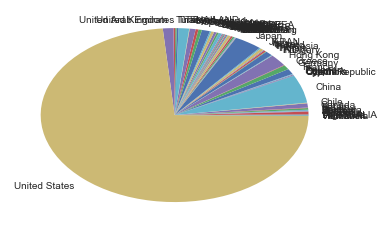

In [5]:
sums = pd.Series(Counter(E_table.Country))
sns.plt.pie(sums, labels=sums.index);

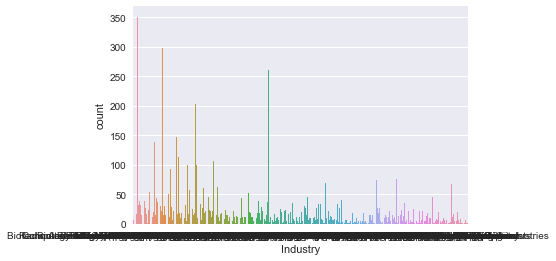

In [6]:
sns.countplot(E_table.Industry)

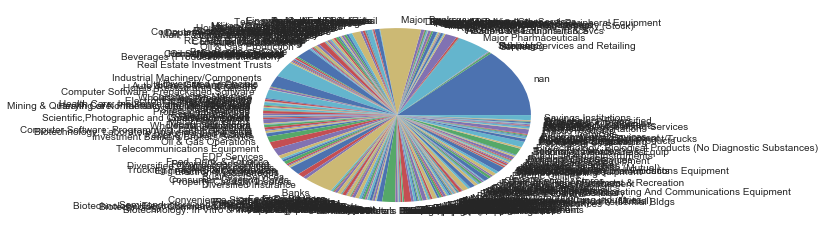

In [7]:
sums = pd.Series(Counter(E_table.Industry))
sns.plt.pie(sums, labels=sums.index);

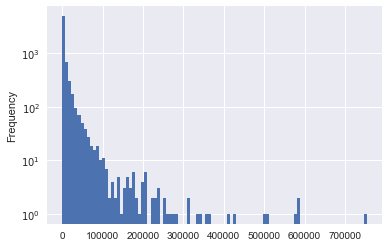

In [8]:
E_table.MarketValue[E_table.MarketValue.notnull()].plot(kind='hist', bins=100, logy=True);

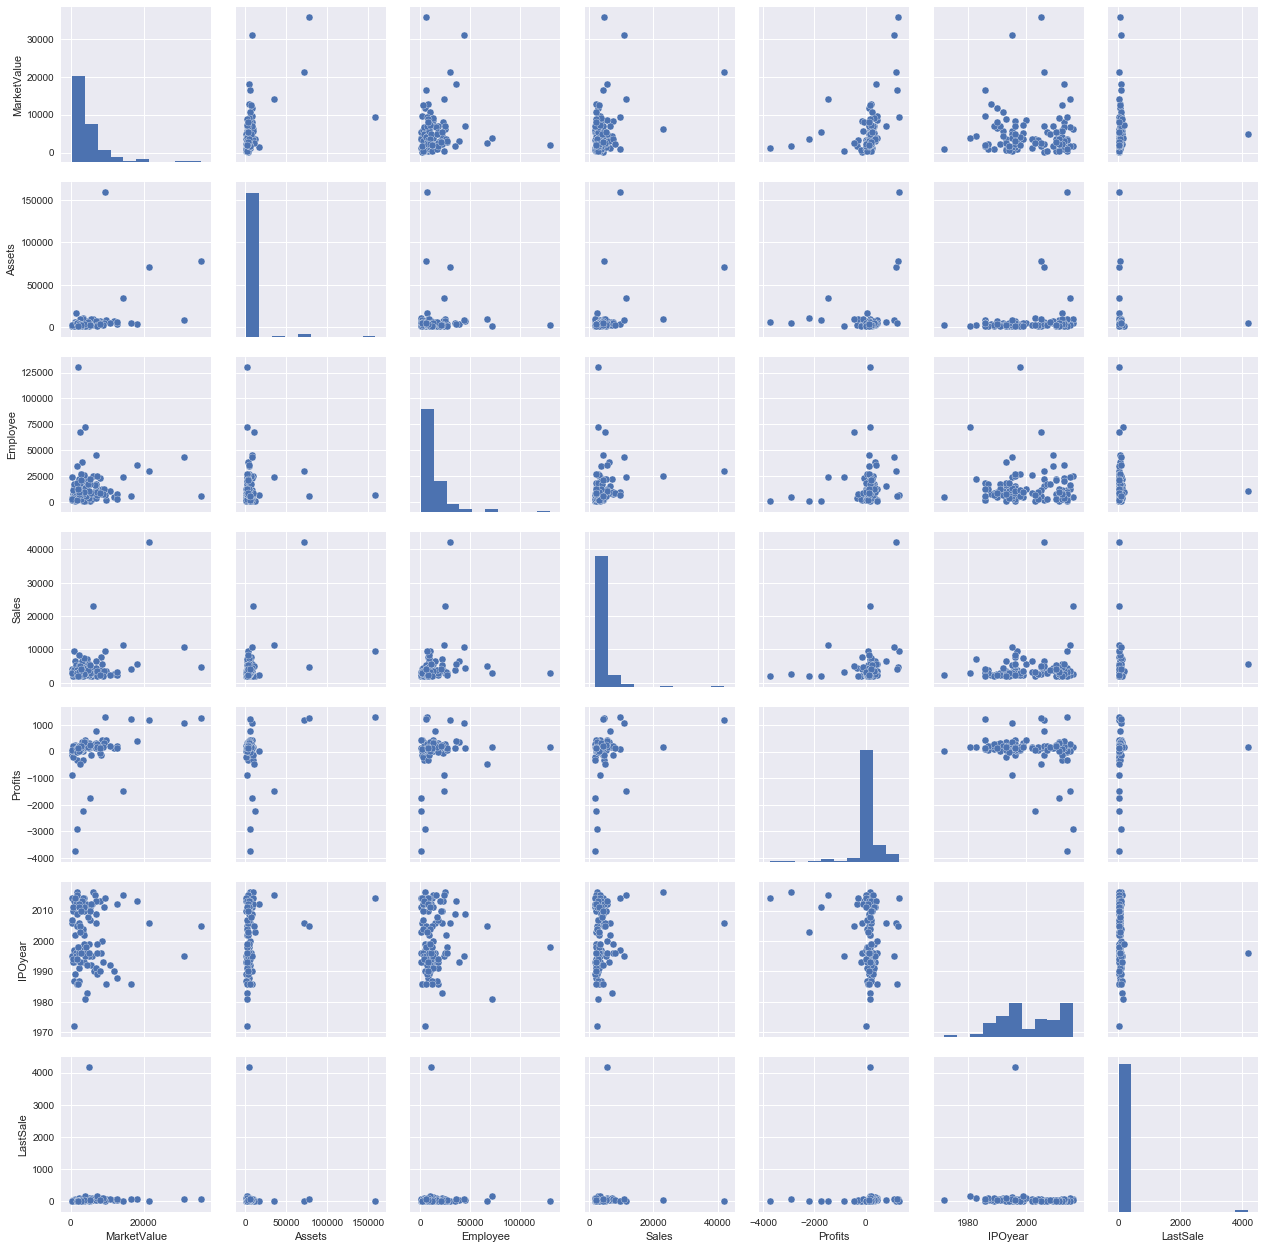

In [52]:
plt.figure();
sns.pairplot(E_table[["MarketValue", "Assets", "Employee", "Sales", "Profits", "IPOyear", "LastSale"]].dropna());
plt.savefig("total.png",dpi = 300);

In [10]:
profit_market = []
for i,item in enumerate(E_table.Profits):
    if str(item) != "nan":
        if str(E_table.MarketValue[i]) != "nan":
            profit_market.append([item, E_table.MarketValue[i]])       

0       2001.0
1       2001.0
2          NaN
3          NaN
4          NaN
5          NaN
6       2016.0
7       1992.0
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14      2003.0
15         NaN
16      2004.0
17      2014.0
18         NaN
19         NaN
20      2013.0
21         NaN
22         NaN
23      1995.0
24      2000.0
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
7091    2012.0
7092       NaN
7093    2007.0
7094    2016.0
7095    2015.0
7096    2015.0
7097    2016.0
7098       NaN
7099       NaN
7100    2012.0
7101    2014.0
7102       NaN
7103    2013.0
7104    2014.0
7105    1991.0
7106    2011.0
7107       NaN
7108    2011.0
7109       NaN
7110       NaN
7111       NaN
7112       NaN
7113       NaN
7114    2010.0
7115    2015.0
7116    2016.0
7117    2005.0
7118    1986.0
7119    2015.0
7120    2011.0
Name: IPOyear, dtype: float64

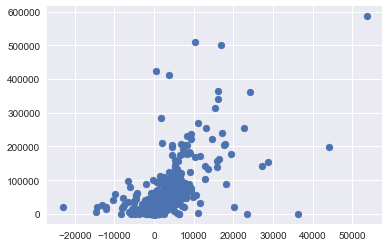

In [11]:
from scipy.interpolate import interp1d
import operator as op
import numpy as np
from scipy import interpolate as ip

plt.figure();
plt.clf();
m1 = sorted(profit_market,key = op.itemgetter(0));
profit = []
market = []
profit_b = []
ipo = []
for item in m1:
    if str(item[1]) == "nan":
        continue
    market.append(item[1]);
    profit.append(item[0]);
    profit_b.append(item[0]+70000);
    
plt.scatter(profit,market);
#y1 = interp1d(profit,market);
y2 = ip.splrep(profit,market, k =2);
xnew = np.linspace(-20000,30000,2000);

plt.plot(xnew,ip.splev(xnew,y2),color = "red")

In [12]:
y2[1]

array([ nan,  nan,  nan, ...,   0.,   0.,   0.])

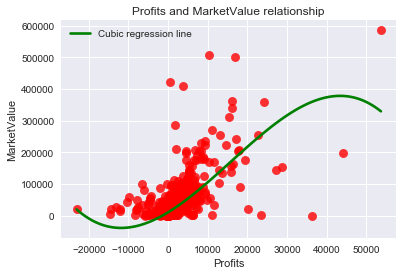

In [13]:
ax = sns.regplot(x = "Profits", y = "MarketValue", data = E_table,scatter_kws = {"s": 80,"color":"r","label":"Original data"},
                 line_kws = {"color":"g","label":"Cubic regression line"},scatter= True,fit_reg = True,
                 order = 3,ci = None, truncate = True);
plt.title("Profits and MarketValue relationship");
plt.legend();
plt.savefig("relation.png",dpi = 300);

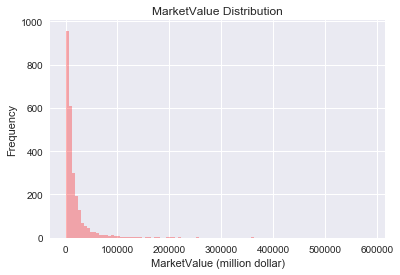

In [41]:
sns.distplot(market, kde = False, bins = 100,kde_kws={"color":"g","lw":4,"label":"Distribution Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plt.ylabel("Frequency");
plt.xlabel("MarketValue (million dollar)");
plt.title("MarketValue Distribution")
plt.savefig("Market.png",dpi=300);

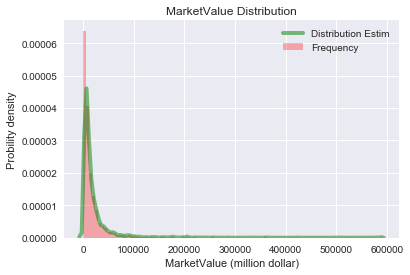

In [42]:
sns.distplot(sorted(market)[:], kde = True, bins = 100,kde_kws={"color":"g","lw":4,"label":"Distribution Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plt.ylabel("Probility density");
plt.xlabel("MarketValue (million dollar)");
plt.title("MarketValue Distribution")
plt.savefig("Market_pdf.png",dpi=300);

In [38]:
ipo = []
m_ipo = []
for i,item in enumerate(E_table.MarketValue):
    if str(item) != "nan":
        if str(E_table.IPOyear[i]) != "nan":
            ipo.append(int(E_table.IPOyear[i]));
            m_ipo.append(float(item));
            

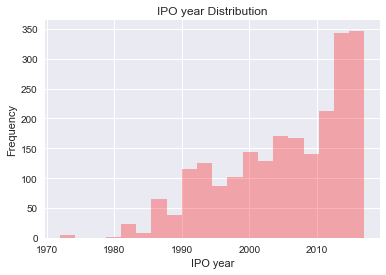

In [50]:
sns.distplot(ipo, kde = False, bins = 20,kde_kws={"color":"g","lw":4,"label":"Distribution Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Frequency"});
plt.ylabel("Frequency");
plt.xlabel("IPO year");
plt.title("IPO year Distribution")
plt.savefig("ipo_20.png",dpi=300);

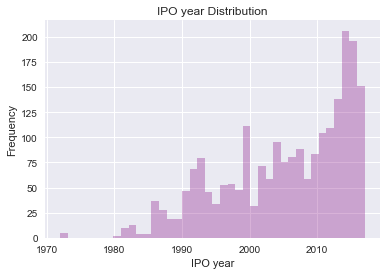

In [51]:
sns.distplot(ipo, kde = False, bins = 40,kde_kws={"color":"g","lw":4,"label":"Distribution Estim","alpha":0.5},
            hist_kws={"color":"purple","alpha":0.3,"label":"Frequency"});
plt.ylabel("Frequency");
plt.xlabel("IPO year");
plt.title("IPO year Distribution")
plt.savefig("ipo_40.png",dpi=300);